# Predict profit of most startups in some countries using Linear Regression Techinqus


R&D Spend : The value that startups spend on research and development

Administration : the value that startups spend on admin panel

Marketing Spend : the value that startups spend on marketing strategies

State : Which country do the startups belong to.

Profit : profit of startups.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# load data
data = pd.read_csv('/content/drive/MyDrive/dataset/startup_data.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.shape

(50, 5)

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
data.duplicated().sum()

np.int64(0)

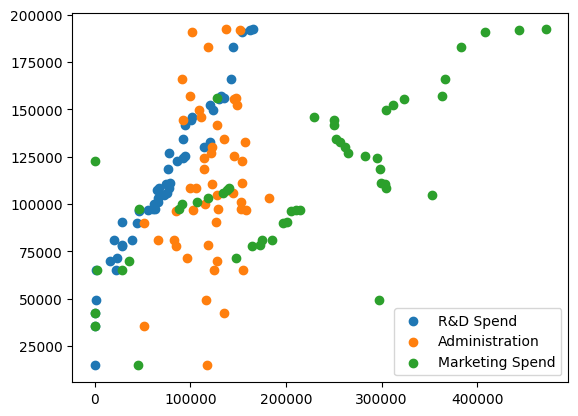

In [ ]:
plt.scatter(x=data["R&D Spend"], y=data["Profit"])
plt.scatter(x=data["Administration"], y=data["Profit"])
plt.scatter(x=data["Marketing Spend"], y=data["Profit"])
plt.legend(["R&D Spend" , "Administration" , "Marketing Spend"])
plt.show()

In [ ]:
corr = data.select_dtypes(include=['number']).corr()
print(corr)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


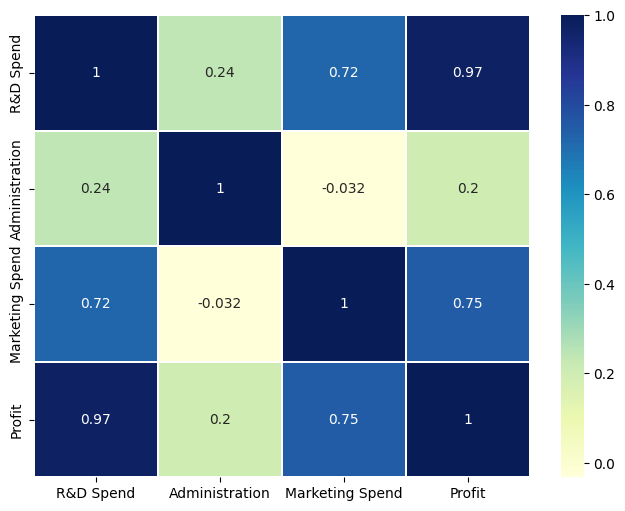

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=0.2)
plt.show()

/tmp/ipython-input-2838952746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[outliers], orient='v' , palette='husl', width=0.7)


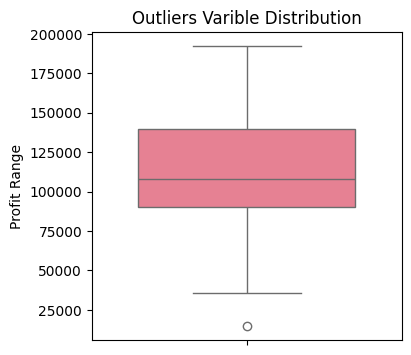

In [ ]:
outliers = "Profit"
plt.rcParams['figure.figsize'] = [4, 4]
sns.boxplot(data=data[outliers], orient='v' , palette='husl', width=0.7)
plt.title("Outliers Varible Distribution")
plt.ylabel("Profit Range")
plt.show()
#after run boxplot exist one outliers to know it( create boxplot b\w  state and profit) to knew from where....

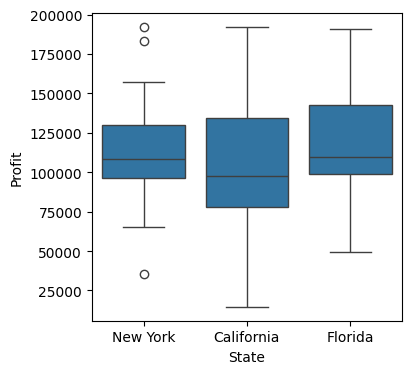

In [ ]:
sns.boxplot(x="State", y="Profit", data=data)
plt.show()
# After run boxplot exist three outliers in "NEWYORK"

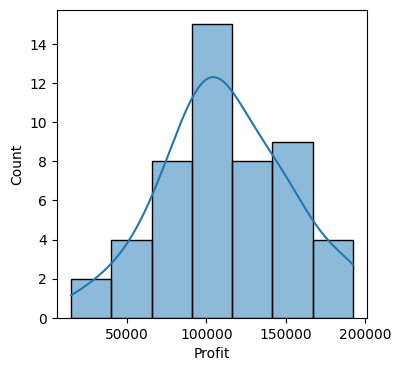

In [ ]:
# create histgram  to know mean of profit (univaritne)
sns.histplot(data = data["Profit"] , kde=True)
plt.show()

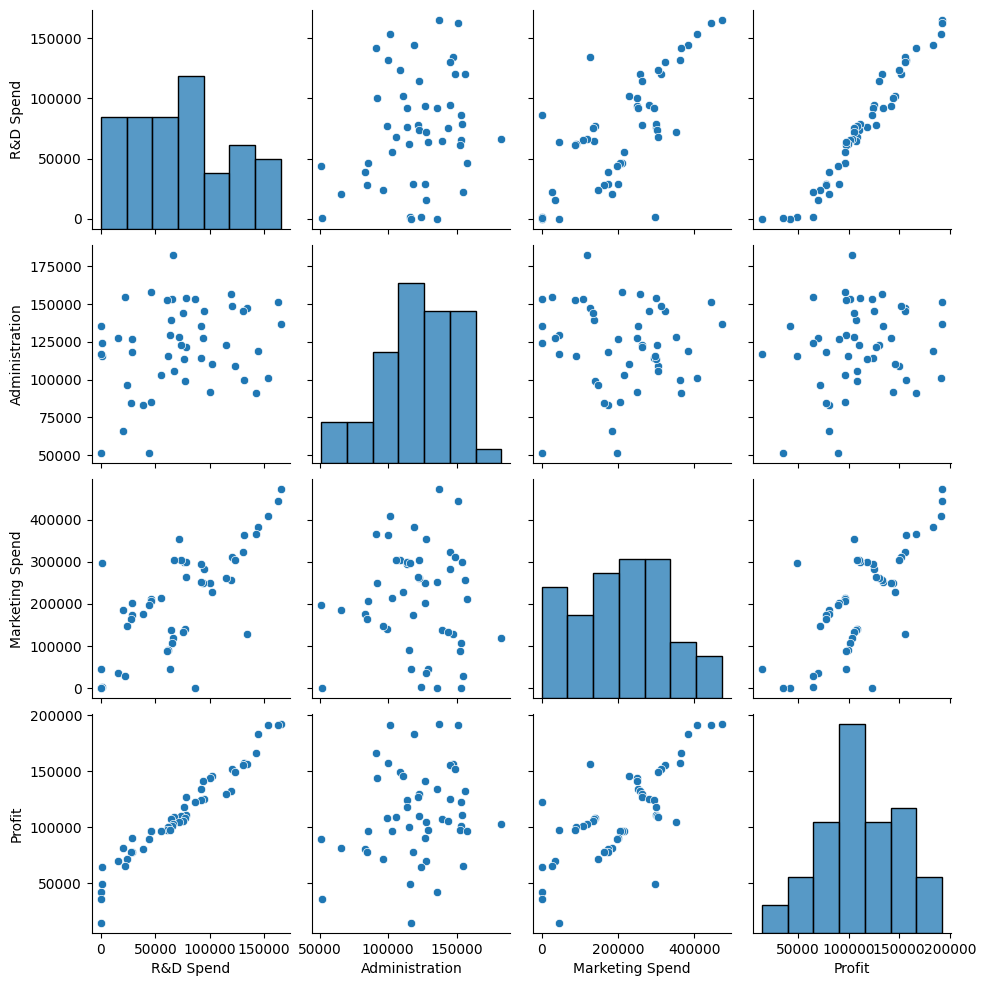

In [ ]:
sns.pairplot(data)  # multivarinte
plt.show()

In [ ]:
# preparing data (split data)
data_without_state = data.drop(columns = "State" , axis=0)
x = data_without_state.iloc[ : , :-1]
y = data_without_state.iloc[ : , -1]

# convert x and y to array....
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)

In [ ]:
# split data to (Train and Test)
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=43)

In [ ]:
model = LinearRegression()
model.fit(x_train , y_train)
predict = model.predict(x_test)

In [ ]:
# calculate score
training_data_score = model.score(x_train , y_train)
print("model score in Training Data : ", training_data_score)

print("*****************************************************")

test_data_score = model.score(x_test , y_test)
print("Model score in Testing Data : ", test_data_score)

model score in Training Data :  0.9567471737022103
*****************************************************
Model score in Testing Data :  0.9168324225542637


In [ ]:
# To calculate r2 score
r2score = r2_score(y_test , predict)
print("R2 Score : " , r2score*100)

R2 Score :  91.68324225542636


In [ ]:
from sklearn.metrics import mean_absolute_error
MeanAbsoluteError = mean_absolute_error(y_test , predict)
print("Mean Absolute Error : " , MeanAbsoluteError)

Mean Absolute Error :  7300.415280653621


In [ ]:
MeanSquareError = (mean_squared_error(y_test , predict))
print("Mean Square Error : " , MeanSquareError)

Mean Square Error :  92037976.65714742


In [ ]:
RootMeanSquaredError = np.sqrt(mean_squared_error(y_test, predict))
print("Root Mean Squared Error : " , RootMeanSquaredError*100)

Root Mean Squared Error :  959364.2512473947


In [ ]:
#  To Add "predict" column in (data)
data_after_perdict = pd.DataFrame(data={"predicted_profit" : predict.flatten() , "Actual value y ":y_test.flatten() , "Difference actual & Predict" : y_test.flatten() -predict.flatten()})
data_after_perdict.head()


,predicted_profit,Actual value y,Difference actual & Predict
0,113531.732229,122776.86,9245.127771
1,72947.853943,90708.19,17760.336057
2,98545.587850,103282.38,4736.792150
3,149209.425529,132602.65,-16606.775529
4,116388.280457,118474.03,2085.749543
